In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import semfunction as sf
import scipy.stats as stats
import plotly.express as px

import os

## Info dataframe

In [69]:
url = r"..\data\cleaned\clean_house.csv"
house = pd.read_csv(url, sep=",")
url = r"..\data\cleaned\clean_app.csv"
app = pd.read_csv(url, sep=",")

In [70]:
house.head(5)

,property_id,locality_name,postal_code,latitude,longitude,property_type,property_subtype,price,type_of_sale,number_of_rooms,...,terrace,terrace_area,garden,garden_area,surface_of_good,number_of_facades,swimming_pool,state_of_building,main_city,province
0,11157483,ronse,9600,50.741809,3.607601,HOUSE,HOUSE,245000.0,BUY_REGULAR,NaN,...,1.0,13.0,1.0,161.0,250.0,2.0,0.0,GOOD,ronse,oost-vlaanderen
1,11156843,merelbeke,9820,51.019250,3.760957,HOUSE,HOUSE,315000.0,BUY_REGULAR,NaN,...,1.0,23.0,NaN,NaN,77.0,2.0,NaN,GOOD,merelbeke,oost-vlaanderen
2,11161362,forêt,4870,50.563966,5.675489,HOUSE,HOUSE,325000.0,BUY_REGULAR,NaN,...,1.0,16.0,1.0,420.0,572.0,3.0,NaN,AS_NEW,trooz,luik
3,11160440,ganshoren,1083,50.873909,4.307285,HOUSE,HOUSE,1149000.0,BUY_REGULAR,NaN,...,1.0,30.0,1.0,270.0,400.0,3.0,NaN,AS_NEW,ganshoren,brussel
4,11153591,ottignies,1340,50.671784,4.575929,HOUSE,HOUSE,395000.0,BUY_REGULAR,NaN,...,1.0,37.0,1.0,76.0,165.0,2.0,NaN,GOOD,ottignies-louvain-la-neuve,waals-brabant


In [71]:
house["open_fire"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 12397 entries, 0 to 12396
Series name: open_fire
Non-Null Count  Dtype
--------------  -----
12397 non-null  int64
dtypes: int64(1)
memory usage: 97.0 KB


In [72]:
house.groupby("state_of_building")["state_of_building"].count()

state_of_building
AS_NEW            1789
GOOD              4510
JUST_RENOVATED     494
TO_BE_DONE_UP     1193
TO_RENOVATE       1791
TO_RESTORE          93
Name: state_of_building, dtype: int64

In [73]:
app.head(5)

,property_id,locality_name,postal_code,latitude,longitude,property_type,property_subtype,price,type_of_sale,number_of_rooms,...,terrace,terrace_area,garden,garden_area,surface_of_good,number_of_facades,swimming_pool,state_of_building,main_city,province
0,11141961,sint-joost-ten-node,1210,NaN,NaN,APARTMENT,FLAT_STUDIO,120000.0,BUY_REGULAR,NaN,...,1.0,6.0,NaN,NaN,NaN,NaN,NaN,TO_BE_DONE_UP,sint-joost-ten-node,brussel
1,11158977,elsene,1050,50.832733,4.364130,APARTMENT,APARTMENT,325000.0,BUY_REGULAR,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,0.0,AS_NEW,elsene,brussel
2,11072105,brussel,1040,50.843509,4.370263,APARTMENT,APARTMENT,650000.0,BUY_REGULAR,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,0.0,AS_NEW,etterbeek,brussel
3,11129303,de haan,8420,51.257157,2.999425,APARTMENT,APARTMENT,119000.0,BUY_REGULAR,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GOOD,de haan,west-vlaanderen
4,11155131,vorselaar,2290,51.202692,4.768350,APARTMENT,APARTMENT,249000.0,BUY_REGULAR,NaN,...,1.0,NaN,NaN,NaN,NaN,3.0,NaN,GOOD,vorselaar,antwerpen


In [74]:
app.groupby("state_of_building")["state_of_building"].count()

state_of_building
AS_NEW            2627
GOOD              3263
JUST_RENOVATED     511
TO_BE_DONE_UP      497
TO_RENOVATE        306
TO_RESTORE          22
Name: state_of_building, dtype: int64

The Question: What is the correlation between the variables and the price? Why do you think some variables are more correlated than others?

Anwser: The price exhibits a significant correlation with the living area and terrace area. This correlations can be attributed to the logical influence of price on the living space of a house. The price has no correlation with number of facades, surface of goods and number of rooms. The reason price and living area are better correlated is because if the house is bigger the price goes up. It also importend to note in which state the house is.


The Question: How are the variables themselves correlated to each other? Can you find groups of variables that are correlated together?

Anwser: There exist correlations beyond just price, notably in the linear relationships between living area and terrace space and garden area and the overall land size(surface area). As the living area within a house expands, so does the corresponding terrace area. The garden area also expands.

## Houses

1082


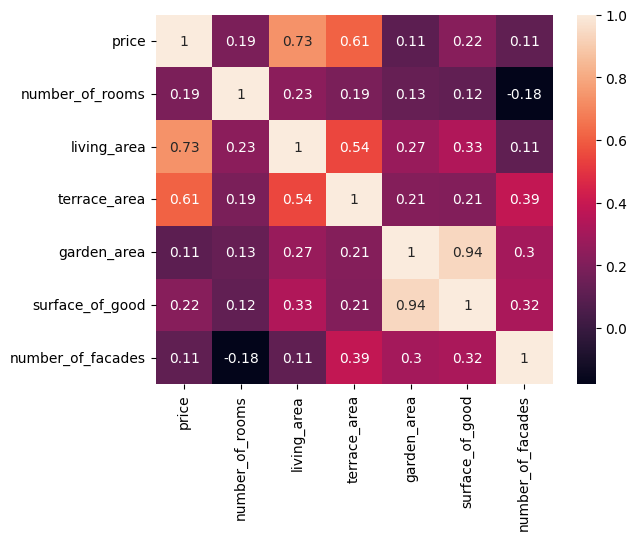

In [75]:

ndf = sf.filter_cities(house, "gent", "brussel", "brugge", "leuven", "antwerpen", "mechelen", "luik", "hasselt", "kortrijk", "doornik", "charleroi", "namen", "ieper", "roeselare")
fdf = ndf[["price", "number_of_rooms", "living_area", "terrace_area", "garden_area", "surface_of_good", "number_of_facades"]]
print(fdf.shape[0])
sf.heatmap(fdf)

In [76]:
fdf.head(10)
fdf = fdf[fdf["living_area"] < 750]
fdf = fdf[fdf["price"] < 500000]


None


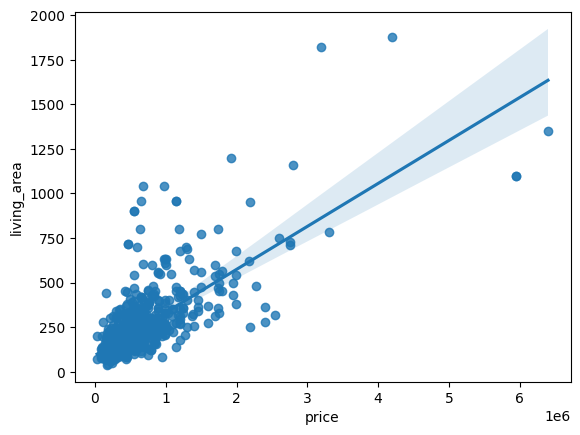

In [77]:

print(sf.regplot(ndf, "price", "living_area"))

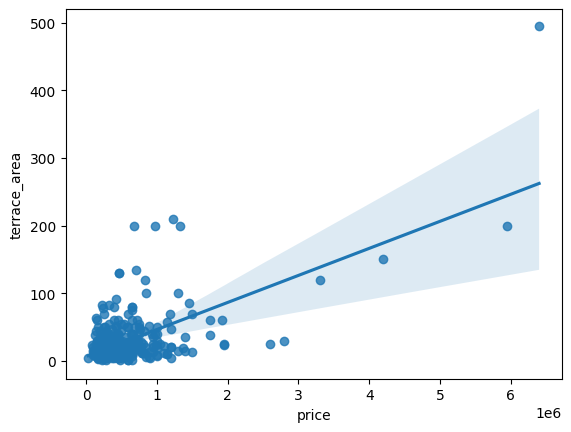

In [78]:
sf.regplot(ndf, "price", "terrace_area")

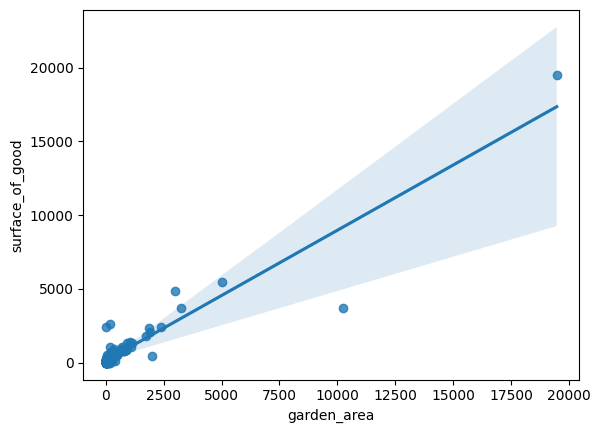

In [79]:
sf.regplot(ndf, "garden_area", "surface_of_good")

## Appartements

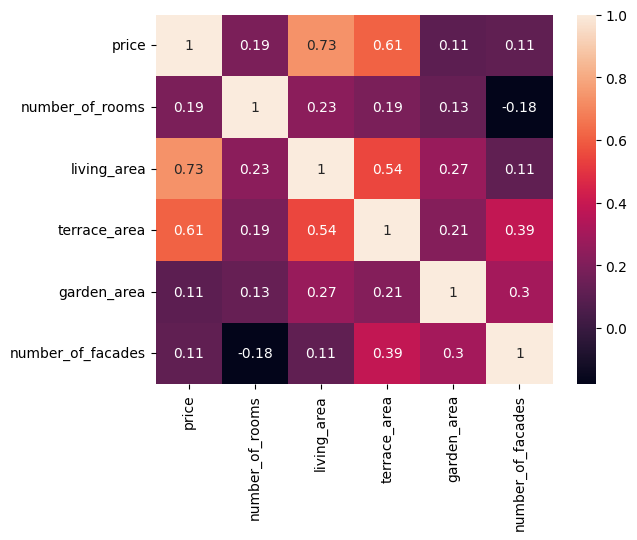

In [80]:
andf = sf.filter_cities(app, "gent", "brussel", "brugge", "leuven", "antwerpen")
afdf = ndf[["price", "number_of_rooms", "living_area", "terrace_area", "garden_area", "number_of_facades"]]
sf.heatmap(afdf)

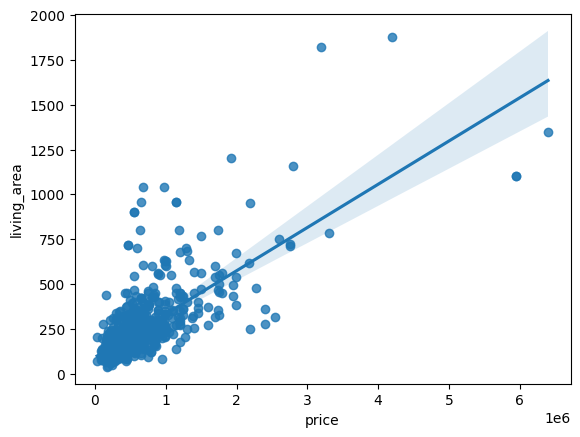

In [81]:
sf.regplot(afdf, "price", "living_area")

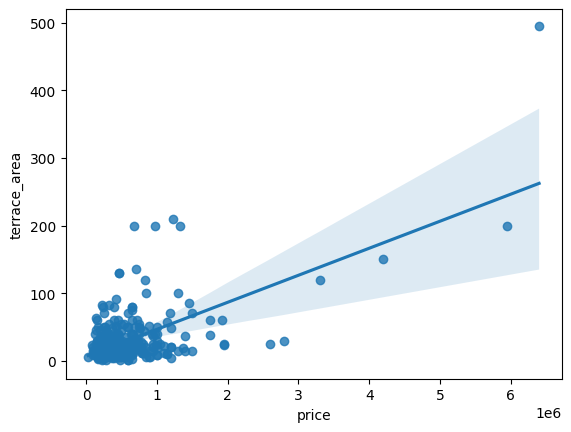

In [82]:
sf.regplot(afdf, "price", "terrace_area")

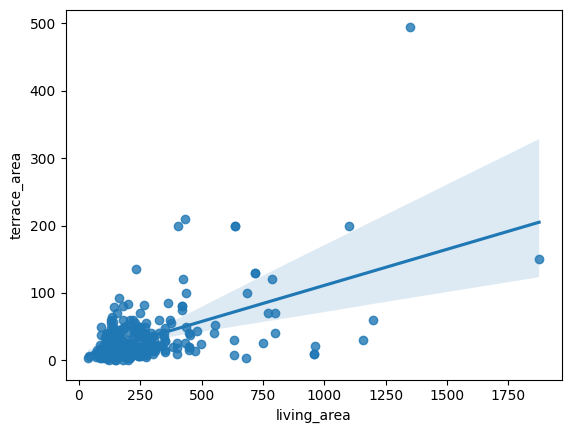

In [83]:
sf.regplot(afdf, "living_area", "terrace_area")

## State of building correlation

In [84]:
house.groupby("state_of_building")["state_of_building"].count()
state_of_building_mapping = {"AS_NEW":6, "GOOD":5, "JUST_RENOVATED":4, "TO_BE_DONE_UP":3, "TO_RENOVATE":2, "TO_RESTORE":1}
state_house = house
state_house["values_state_building"] =  state_house["state_of_building"].replace(state_of_building_mapping)
state_house.head(5)

C:\Users\semde\AppData\Local\Temp\ipykernel_20112\3684524679.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  state_house["values_state_building"] =  state_house["state_of_building"].replace(state_of_building_mapping)


,property_id,locality_name,postal_code,latitude,longitude,property_type,property_subtype,price,type_of_sale,number_of_rooms,...,terrace_area,garden,garden_area,surface_of_good,number_of_facades,swimming_pool,state_of_building,main_city,province,values_state_building
0,11157483,ronse,9600,50.741809,3.607601,HOUSE,HOUSE,245000.0,BUY_REGULAR,NaN,...,13.0,1.0,161.0,250.0,2.0,0.0,GOOD,ronse,oost-vlaanderen,5.0
1,11156843,merelbeke,9820,51.019250,3.760957,HOUSE,HOUSE,315000.0,BUY_REGULAR,NaN,...,23.0,NaN,NaN,77.0,2.0,NaN,GOOD,merelbeke,oost-vlaanderen,5.0
2,11161362,forêt,4870,50.563966,5.675489,HOUSE,HOUSE,325000.0,BUY_REGULAR,NaN,...,16.0,1.0,420.0,572.0,3.0,NaN,AS_NEW,trooz,luik,6.0
3,11160440,ganshoren,1083,50.873909,4.307285,HOUSE,HOUSE,1149000.0,BUY_REGULAR,NaN,...,30.0,1.0,270.0,400.0,3.0,NaN,AS_NEW,ganshoren,brussel,6.0
4,11153591,ottignies,1340,50.671784,4.575929,HOUSE,HOUSE,395000.0,BUY_REGULAR,NaN,...,37.0,1.0,76.0,165.0,2.0,NaN,GOOD,ottignies-louvain-la-neuve,waals-brabant,5.0


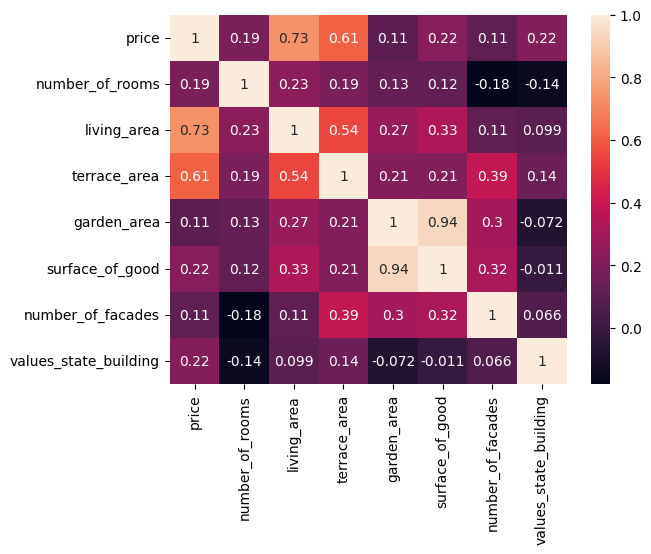

In [85]:
state = sf.filter_cities(state_house, "gent", "brussel", "brugge", "leuven", "antwerpen", "mechelen", "luik", "hasselt", "kortrijk", "doornik", "charleroi", "namen", "ieper", "roeselare")
nstate = state[["price", "number_of_rooms", "living_area", "terrace_area", "garden_area", "surface_of_good", "number_of_facades", "values_state_building"]]
sf.heatmap(nstate)

## provincies

In [96]:
# Get the current directory (analyses folder)
current_dir = os.getcwd()

# Navigate up one directory to reach the parent directory (which contains the data folder)
parent_dir = os.path.dirname(current_dir)

# Define the file paths relative to the parent directory using os.path.join
clean_huis_te_koop_path = os.path.join(parent_dir, "data", "cleaned", "clean_house.csv")
clean_apartement_te_koop_path = os.path.join(parent_dir, "data", "cleaned", "clean_app.csv")

house1 = pd.read_csv(clean_huis_te_koop_path, sep=",")
app1 = pd.read_csv(clean_apartement_te_koop_path, sep=",")

### Houses

In [97]:
west = house1[house1["province"]=="west-vlaanderen"]
oost = house1[house1["province"]=="oost-vlaanderen"]
limburg = house1[house1["province"]=="limburg"]
antwerpen = house1[house1["province"]=="antwerpen"]
brussel = house1[house1["province"]=="brussel"]
henegouwen = house1[house1["province"]=="henegouwen"]
luik = house1[house1["province"]=="luik"]
luxemburg = house1[house1["province"]=="luxemburg"]
namen = house1[house1["province"]=="namen"]
vlaams_brabant = house1[house1["province"]=="vlaams-brabant"]
waals_brabant = house1[house1["province"]=="waals-brabant"]

house1.groupby("province")["province"].count()

province
antwerpen          2039
brussel             763
henegouwen          929
limburg             447
luik               1139
luxemburg           460
namen               396
oost-vlaanderen    2357
vlaams-brabant     1357
waals-brabant       586
west-vlaanderen    1924
Name: province, dtype: int64

In [98]:
westcorr = sf.drop_object_columns(west)
oostcorr = sf.drop_object_columns(oost)
limburgcorr = sf.drop_object_columns(limburg)
antwerpencorr = sf.drop_object_columns(antwerpen)
brusselcorr = sf.drop_object_columns(brussel)
henegouwencorr = sf.drop_object_columns(henegouwen)
luikcorr = sf.drop_object_columns(luik)
luxemburgcorr = sf.drop_object_columns(luxemburg)
namencorr = sf.drop_object_columns(namen)
vlaams_brabantcorr = sf.drop_object_columns(vlaams_brabant)
waals_brabantcorr = sf.drop_object_columns(waals_brabant)

586


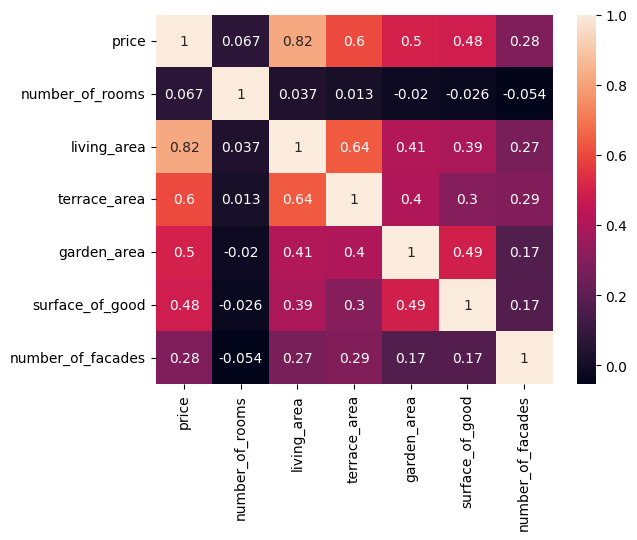

In [99]:
print(waals_brabantcorr.shape[0])
sf.heatmap(waals_brabantcorr)

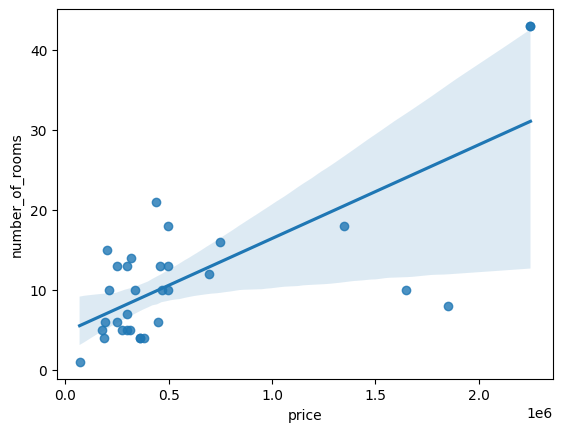

In [100]:
sf.regplot(luxemburgcorr, "price", "number_of_rooms")

### appartement

In [101]:
awest = app1[app1["province"]=="west-vlaanderen"]
aoost = app1[app1["province"]=="oost-vlaanderen"]
alimburg = app1[app1["province"]=="limburg"]
aantwerpen = app1[app1["province"]=="antwerpen"]
abrussel = app1[app1["province"]=="brussel"]
ahenegouwen = app1[app1["province"]=="henegouwen"]
aluik = app1[app1["province"]=="luik"]
aluxemburg = app1[app1["province"]=="luxemburg"]
anamen = app1[app1["province"]=="namen"]
avlaams_brabant = app1[app1["province"]=="vlaams-brabant"]
awaals_brabant = app1[app1["province"]=="waals-brabant"]

app1.groupby("province")["province"].count()

province
antwerpen          1896
brussel            2131
henegouwen          226
limburg             301
luik                388
luxemburg           138
namen               145
oost-vlaanderen    1207
vlaams-brabant      660
waals-brabant       236
west-vlaanderen    2140
Name: province, dtype: int64

In [115]:
def drop_object_columns_app(df):
    fdf = df[["price", "number_of_rooms", "living_area", "terrace_area", "garden_area", "number_of_facades"]]
    return fdf


awestcorr = drop_object_columns_app(awest)
aoostcorr = drop_object_columns_app(aoost)
alimburgcorr = drop_object_columns_app(alimburg)
aantwerpencorr = drop_object_columns_app(aantwerpen)
abrusselcorr = drop_object_columns_app(abrussel)
ahenegouwencorr = drop_object_columns_app(ahenegouwen)
aluikcorr = drop_object_columns_app(aluik)
aluxemburgcorr = drop_object_columns_app(aluxemburg)
anamencorr = drop_object_columns_app(anamen)
avlaams_brabantcorr = drop_object_columns_app(avlaams_brabant)
awaals_brabantcorr = drop_object_columns_app(awaals_brabant)

236


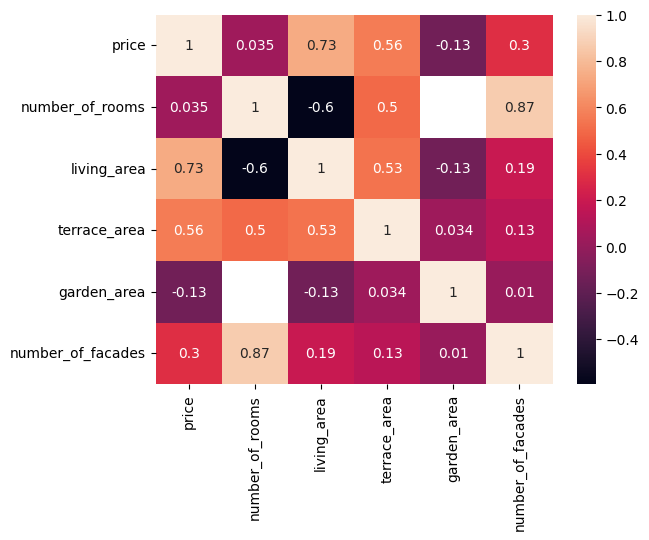

In [126]:
print(awaals_brabantcorr.shape[0])
sf.heatmap(awaals_brabantcorr)

<Axes: >

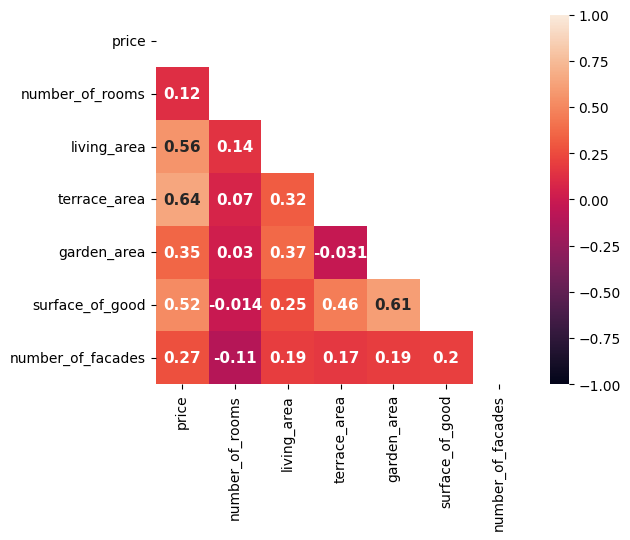

In [158]:

mask = np.triu(np.ones_like(limburgcorr.corr()))
sns.heatmap(limburgcorr.corr(), annot=True, vmin=-1, vmax=1, annot_kws={"fontsize":11, "fontweight":"bold"}, square=True, mask=mask)


## Other visualizations

In [127]:
house1.columns

Index(['property_id', 'locality_name', 'postal_code', 'latitude', 'longitude',
       'property_type', 'property_subtype', 'price', 'type_of_sale',
       'number_of_rooms', 'living_area', 'kitchen_type',
       'fully_equipped_kitchen', 'furnished', 'open_fire', 'terrace',
       'terrace_area', 'garden', 'garden_area', 'surface_of_good',
       'number_of_facades', 'swimming_pool', 'state_of_building', 'main_city',
       'province'],
      dtype='object')

C:\Users\semde\AppData\Local\Temp\ipykernel_20112\3622204896.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




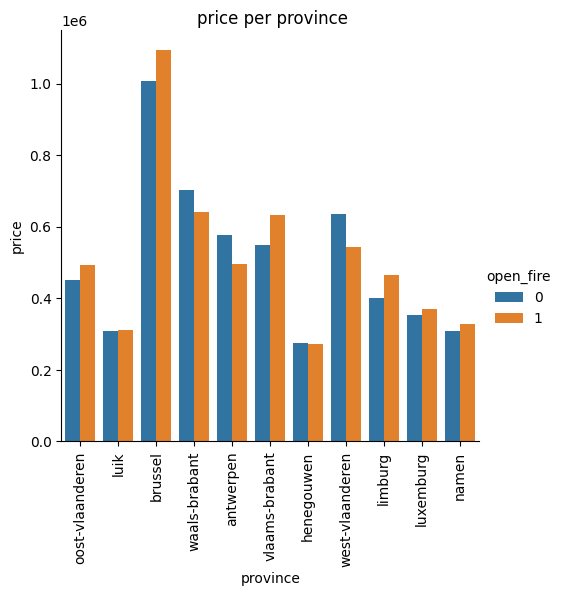

In [143]:

fig = px.colors.qualitative.swatches()

g = sns.catplot(x="province",1
                y="price",
                data=house1,
                kind="bar",
                hue="open_fire",
                ci=None)
g.fig.suptitle("price per province")
plt.xticks(rotation=90)
plt.show()


(array([ 349., 1042.,  321.,  118.,   44.,   22.,   12.,    7.,    6.,
           3.]),
 array([  32. ,  134.5,  237. ,  339.5,  442. ,  544.5,  647. ,  749.5,
         852. ,  954.5, 1057. ]),
 <BarContainer object of 10 artists>)

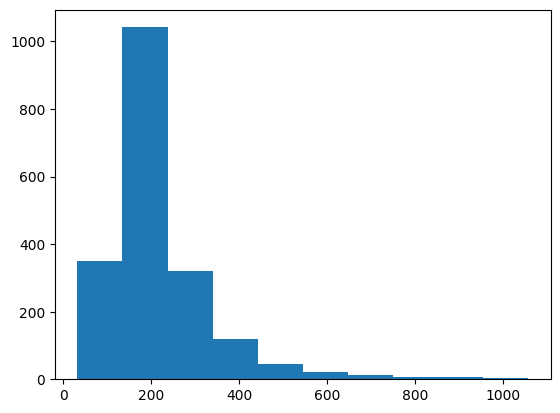

In [164]:
mhouse = house
westv = mhouse[mhouse["province"]=="west-vlaanderen"]
plt.hist(westv.living_area)

